In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [96]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

#Keras
import tensorflow as tf
tf.keras.backend.clear_session()
from keras.models import Sequential
from keras.layers import Dense

**link interesante**: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

# Lectura datos

In [252]:
df_train = pd.read_csv("datasets/df_train_estand.csv") 
df_test = pd.read_csv("datasets/df_test_estand.csv") 

In [253]:
df_train.head(4)

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_N,WindDir3pm_SSW,WindDir3pm_SE,WindDir3pm_NNW,WindDir3pm_ENE,WindDir3pm_NW,WindDir3pm_WSW,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_SSE
0,1,1.105881,0.463667,0.172916,0.464414,0.457727,1.420500,0.570674,1.871575,0.853231,...,0,0,0,0,0,0,0,0,0,0
1,2,1.208613,0.369192,0.003670,0.106431,-1.670080,0.195810,1.135058,0.337745,0.267711,...,0,0,0,0,0,0,0,0,0,0
2,3,1.585297,1.077751,-0.306613,0.882061,1.806338,-0.596637,-0.332339,-0.252190,-0.552017,...,0,0,0,0,0,0,0,0,0,0
3,4,-0.109781,0.180243,-0.221990,-0.191888,0.337851,-0.308474,-0.558093,-1.196085,-0.259257,...,0,0,0,0,0,0,0,0,0,0


In [254]:
del df_train['Unnamed: 0']
del df_test['Unnamed: 0']

In [257]:
df_selected_train = df_train[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Location_Canberra', 'Location_Adelaide', 'Location_Melbourne', 'Location_Sydney', 'Season_fall', 'Season_spring', 'Season_winter', 'Season_summer', 'RainTomorrow']]
df_selected_test = df_test[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Location_Canberra', 'Location_Adelaide', 'Location_Melbourne', 'Location_Sydney', 'Season_fall', 'Season_spring', 'Season_winter', 'Season_summer', 'RainTomorrow']]

In [258]:
df_selected_train.head(4)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,RainToday,Location_Canberra,Location_Adelaide,Location_Melbourne,Location_Sydney,Season_fall,Season_spring,Season_winter,Season_summer,RainTomorrow
0,1.105881,0.463667,0.172916,0.464414,0.457727,1.420500,0.570674,1.871575,0.853231,0.591041,...,1,0,0,0,1,0,0,0,1,0
1,1.208613,0.369192,0.003670,0.106431,-1.670080,0.195810,1.135058,0.337745,0.267711,0.591041,...,1,0,0,0,1,1,0,0,0,1
2,1.585297,1.077751,-0.306613,0.882061,1.806338,-0.596637,-0.332339,-0.252190,-0.552017,-0.370259,...,0,0,1,0,0,0,0,0,1,0
3,-0.109781,0.180243,-0.221990,-0.191888,0.337851,-0.308474,-0.558093,-1.196085,-0.259257,-0.652995,...,0,0,0,1,0,0,1,0,0,0


In [259]:
X_train = df_selected_train.iloc[:, :-1].values #selected_
y_train = df_selected_train.iloc[:, -1:].values
X_test = df_selected_test.iloc[:, :-1].values
y_test = df_selected_test.iloc[:, -1:].values

# Fit model

Primero realizamos una prueba con una red neuronal sequencial y a partir de ésta vamos a ir ajustándola.

In [261]:
model = Sequential()
model.add(Dense(12, input_dim=25, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [262]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Recall()])

In [211]:
# fit the keras model on the dataset
X_train = np.asarray(X_train).astype(np.float32)
model_fitted = model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
820/820 [==============================] - 1s 638us/step - loss: 0.4247 - accuracy: 0.8146 - recall_12: 0.3630
Epoch 2/150
820/820 [==============================] - 1s 636us/step - loss: 0.3730 - accuracy: 0.8360 - recall_12: 0.5053
Epoch 3/150
820/820 [==============================] - 1s 655us/step - loss: 0.3658 - accuracy: 0.8438 - recall_12: 0.5222
Epoch 4/150
820/820 [==============================] - 1s 653us/step - loss: 0.3595 - accuracy: 0.8443 - recall_12: 0.5159
Epoch 5/150
820/820 [==============================] - 1s 655us/step - loss: 0.3548 - accuracy: 0.8476 - recall_12: 0.5217
Epoch 6/150
820/820 [==============================] - 1s 663us/step - loss: 0.3523 - accuracy: 0.8476 - recall_12: 0.5307
Epoch 7/150
820/820 [==============================] - 1s 682us/step - loss: 0.3478 - accuracy: 0.8522 - recall_12: 0.5407
Epoch 8/150
820/820 [==============================] - 1s 710us/step - loss: 0.3453 - accuracy: 0.8505 - recall_12: 0.5370
Epoch 9/150
820/

820/820 [==============================] - 1s 685us/step - loss: 0.2499 - accuracy: 0.8951 - recall_12: 0.7132
Epoch 133/150
820/820 [==============================] - 1s 662us/step - loss: 0.2500 - accuracy: 0.8929 - recall_12: 0.7048
Epoch 134/150
820/820 [==============================] - 1s 699us/step - loss: 0.2492 - accuracy: 0.8935 - recall_12: 0.6995
Epoch 135/150
820/820 [==============================] - 1s 703us/step - loss: 0.2502 - accuracy: 0.8943 - recall_12: 0.7037
Epoch 136/150
820/820 [==============================] - 1s 689us/step - loss: 0.2502 - accuracy: 0.8938 - recall_12: 0.7090
Epoch 137/150
820/820 [==============================] - 1s 716us/step - loss: 0.2478 - accuracy: 0.8950 - recall_12: 0.7127
Epoch 138/150
820/820 [==============================] - 1s 699us/step - loss: 0.2478 - accuracy: 0.8960 - recall_12: 0.7138
Epoch 139/150
820/820 [==============================] - 1s 716us/step - loss: 0.2484 - accuracy: 0.8934 - recall_12: 0.7085
Epoch 140/150


**añadir gráfico**

In [214]:
# evaluate the keras model
_, accuracy, recall = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))
print('Recall: %.2f' % (recall*100))

257/257 [==============================] - 0s 625us/step - loss: 0.2355 - accuracy: 0.9016 - recall_12: 0.7556
Accuracy: 90.16
Recall: 75.56


# Predictions & Evaluate

In [241]:
loss, accuracy_test, recall_test = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy_test*100))
print('Recall: %.2f' % (recall_test*100))

# sin estandarizar:  Accuracy: 83.35 Recall: 42.32
# estandarizando: Accuracy: 84.43, Recall: 52.14 (53 con más variables)

Accuracy: 81.49
Recall: 53.07


# Plots

In [ ]:
model_fitted = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0)

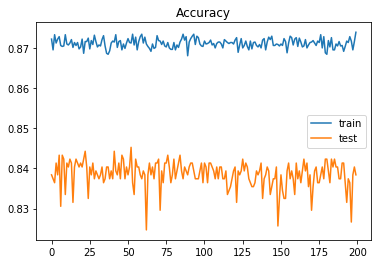

In [126]:
# plot accuracy during training
plt.title('Accuracy')
plt.plot(model_fitted.history['accuracy'], label='train')
plt.plot(model_fitted.history['val_accuracy'], label='test')
plt.legend()
#plt.ylim([0, 1])
plt.show()

# Fit model 2

Primero realizamos una prueba con una red neuronal sequencial y a partir de ésta vamos a ir ajustándola.

In [268]:
model2 = Sequential()
model2.add(Dense(15, input_dim=25, activation='relu'))
#model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [269]:
model2.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 15)                390       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 16        
Total params: 406
Trainable params: 406
Non-trainable params: 0
_________________________________________________________________


In [285]:
# compile the keras model
recall = tf.keras.metrics.Recall()
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', recall])

In [286]:
# fit the keras model on the dataset
X_train = np.asarray(X_train).astype(np.float32)
model_fitted = model2.fit(X_train, y_train, epochs=150, batch_size=20)

Epoch 1/150
410/410 [==============================] - 0s 625us/step - loss: 0.3006 - accuracy: 0.8698 - recall_18: 0.6238
Epoch 2/150
410/410 [==============================] - 0s 632us/step - loss: 0.3008 - accuracy: 0.8717 - recall_18: 0.6217
Epoch 3/150
410/410 [==============================] - 0s 642us/step - loss: 0.3001 - accuracy: 0.8699 - recall_18: 0.6217
Epoch 4/150
410/410 [==============================] - 0s 646us/step - loss: 0.3006 - accuracy: 0.8690 - recall_18: 0.6206
Epoch 5/150
410/410 [==============================] - 0s 630us/step - loss: 0.3011 - accuracy: 0.8709 - recall_18: 0.6222
Epoch 6/150
410/410 [==============================] - 0s 639us/step - loss: 0.3011 - accuracy: 0.8702 - recall_18: 0.6185
Epoch 7/150
410/410 [==============================] - 0s 667us/step - loss: 0.3000 - accuracy: 0.8704 - recall_18: 0.6238
Epoch 8/150
410/410 [==============================] - 0s 646us/step - loss: 0.2995 - accuracy: 0.8705 - recall_18: 0.6217
Epoch 9/150
410/

410/410 [==============================] - 0s 635us/step - loss: 0.2989 - accuracy: 0.8698 - recall_18: 0.6185
Epoch 133/150
410/410 [==============================] - 0s 633us/step - loss: 0.2995 - accuracy: 0.8710 - recall_18: 0.6222
Epoch 134/150
410/410 [==============================] - 0s 636us/step - loss: 0.3006 - accuracy: 0.8698 - recall_18: 0.6169
Epoch 135/150
410/410 [==============================] - 0s 639us/step - loss: 0.2996 - accuracy: 0.8722 - recall_18: 0.6254
Epoch 136/150
410/410 [==============================] - 0s 638us/step - loss: 0.3001 - accuracy: 0.8709 - recall_18: 0.6265
Epoch 137/150
410/410 [==============================] - 0s 638us/step - loss: 0.2992 - accuracy: 0.8699 - recall_18: 0.6249
Epoch 138/150
410/410 [==============================] - 0s 640us/step - loss: 0.2996 - accuracy: 0.8712 - recall_18: 0.6270
Epoch 139/150
410/410 [==============================] - 0s 644us/step - loss: 0.2996 - accuracy: 0.8706 - recall_18: 0.6217
Epoch 140/150


In [281]:
# evaluate the keras model
_, accuracy, recall = model2.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))
print('Recall: %.2f' % (recall*100))

257/257 [==============================] - 0s 581us/step - loss: 0.3019 - accuracy: 0.8709 - recall_17: 0.6836
Accuracy: 87.09
Recall: 68.36


# Predictions & Evaluate

In [282]:
loss, accuracy_test, recall_test = model2.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy_test*100))
print('Recall: %.2f' % (recall_test*100))

# sin estandarizar:  Accuracy: 83.35 Recall: 42.32
# estandarizando: Accuracy: 84.13, Recall: 57.89, 1 capa, 15 neuronas (60 con batch size 20)

Accuracy: 83.35
Recall: 60.09


In [303]:
predictions = model2.predict(X_test)
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))

NameError: name 'metrics' is not defined

# Plots

In [289]:
model_fitted = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, verbose=0)

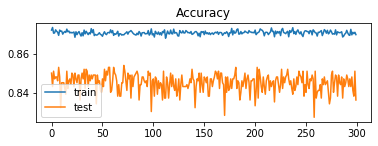

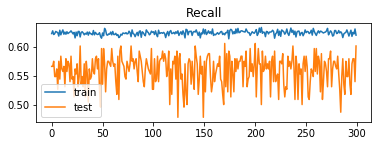

In [301]:
# plot accuracy 
plt.subplot(211)
plt.title('Accuracy')
plt.plot(model_fitted.history['accuracy'], label='train')
plt.plot(model_fitted.history['val_accuracy'], label='test')
plt.legend()
#plt.ylim([0, 1])
plt.show()

# plot recall 
plt.subplot(212)
plt.title('Recall')
plt.plot(model_fitted.history['recall_18'], label='train')
plt.plot(model_fitted.history['val_recall_18'], label='test')
plt.legend()
#plt.ylim([0, 1])
plt.show()

**probar con capas dropa**

# EXTRA

In [238]:
df_selected_train = df_train[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Location_Sydney', 'Location_Adelaide', 'Location_Melbourne', 'Location_Canberra', 'Season_summer', 'Season_fall', 'Season_spring', 'Season_winter', 'WindGustDir_SSE', 'WindGustDir_ESE', 'WindGustDir_S', 'WindGustDir_SW', 'WindGustDir_WSW', 'WindGustDir_NW', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_WNW', 'WindGustDir_W', 'WindGustDir_NE', 'WindGustDir_SE', 'WindGustDir_SSW', 'WindGustDir_ENE', 'WindGustDir_N', 'WindGustDir_E', 'WindDir9am_SSW', 'WindDir9am_E', 'WindDir9am_SE',
       'WindDir9am_WNW', 'WindDir9am_W', 'WindDir9am_NE', 'WindDir9am_NW', 'WindDir9am_SW', 'WindDir9am_N', 'WindDir9am_SSE', 'WindDir9am_S', 'WindDir9am_ENE', 'WindDir9am_WSW', 'WindDir9am_NNW', 'WindDir9am_NNE', 'WindDir9am_ESE', 'WindDir3pm_S', 'WindDir3pm_E', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_ESE', 'WindDir3pm_WNW', 'WindDir3pm_N', 'WindDir3pm_SSW', 'WindDir3pm_SE', 'WindDir3pm_NNW', 'WindDir3pm_ENE', 'WindDir3pm_NW', 'WindDir3pm_WSW', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_SSE', 'RainTomorrow']]

df_selected_test = df_test[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Location_Sydney', 'Location_Adelaide', 'Location_Melbourne', 'Location_Canberra', 'Season_summer', 'Season_fall', 'Season_spring', 'Season_winter',
       'WindGustDir_SSE', 'WindGustDir_ESE', 'WindGustDir_S', 'WindGustDir_SW', 'WindGustDir_WSW', 'WindGustDir_NW', 'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_WNW', 'WindGustDir_W', 'WindGustDir_NE', 'WindGustDir_SE', 'WindGustDir_SSW', 'WindGustDir_ENE', 'WindGustDir_N',
       'WindGustDir_E', 'WindDir9am_SSW', 'WindDir9am_E', 'WindDir9am_SE', 'WindDir9am_WNW', 'WindDir9am_W', 'WindDir9am_NE', 'WindDir9am_NW', 'WindDir9am_SW', 'WindDir9am_N', 'WindDir9am_SSE', 'WindDir9am_S', 'WindDir9am_ENE', 'WindDir9am_WSW', 'WindDir9am_NNW', 'WindDir9am_NNE',
       'WindDir9am_ESE', 'WindDir3pm_S', 'WindDir3pm_E', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_ESE', 'WindDir3pm_WNW', 'WindDir3pm_N', 'WindDir3pm_SSW', 'WindDir3pm_SE', 'WindDir3pm_NNW', 'WindDir3pm_ENE', 'WindDir3pm_NW', 'WindDir3pm_WSW', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_SSE', 'RainTomorrow']]